In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from IPython.display import display_html 

# Data Cleaning

In [2]:
pd.read_csv('Online_Cars_Sale_Marketplace.csv')

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,"$61,998",4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [3]:
original_frame = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

In [4]:
original_frame.dtypes

Year                       int64
Make                      object
Model                     object
Used/New                  object
Price                     object
ConsumerRating           float64
ConsumerReviews            int64
SellerType                object
SellerName                object
SellerRating             float64
SellerReviews              int64
StreetName                object
State                     object
Zipcode                   object
DealType                  object
ComfortRating            float64
InteriorDesignRating     float64
PerformanceRating        float64
ValueForMoneyRating      float64
ExteriorStylingRating    float64
ReliabilityRating        float64
ExteriorColor             object
InteriorColor             object
Drivetrain                object
MinMPG                     int64
MaxMPG                     int64
FuelType                  object
Transmission              object
Engine                    object
VIN                       object
Stock#    

In [5]:
original_frame.drop(original_frame[original_frame['Price']=='Not Priced'].index, inplace = True)

original_frame['Price']=original_frame['Price'].str.replace(',','')
original_frame['Price']=original_frame['Price'].str.replace('$','')
original_frame['Price']=original_frame['Price'].astype(int)

/var/folders/zr/km3s5d057fq865502skt0rc80000gn/T/ipykernel_38485/4133354764.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  original_frame['Price']=original_frame['Price'].str.replace('$','')


In [6]:
#turning listing prices from objects into integers and turning Used/New column into string format. 

In [7]:
original_frame['Used/New']=original_frame['Used/New'].astype(str)

In [8]:
original_frame

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [9]:
original_frame['Drivetrain']=original_frame['Drivetrain'].astype(str)
original_frame.drop(original_frame[original_frame['Drivetrain']=='-'].index, inplace = True)

In [10]:
original_frame

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9374,2019,Subaru,Crosstrek 2.0i Premium,Used,27374,4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
9375,2019,Audi,Q8 3.0T Premium,Used,61998,4.8,27,Dealer,Autobahn USA Westborough,4.8,...,Black,All-wheel Drive,17,22,Hybrid,8-Speed Automatic,3.0L V6 24V GDI DOHC Turbo Hybrid,WA1AVAF14KD015389,AB4719,46855
9376,2017,Buick,Enclave Leather,Used,26944,4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
9377,2019,Subaru,Forester Premium,Used,28568,4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


# Most popular manufacturers

In [11]:
indexed_by_make = original_frame.set_index(['Make'])
avg_review_score_make = indexed_by_make.groupby(['Make'])['ConsumerRating'].mean()
unique_value = original_frame.drop_duplicates(subset = ['Model'])
unique_value.set_index('Make')
count_reviews_maker = unique_value.groupby(['Make'])['ConsumerReviews'].sum()
count_reviews_maker
review_and_count = pd.DataFrame({
    'Average Review' : avg_review_score_make,
    'Num of Reviews': count_reviews_maker
})
top_performers = review_and_count[(review_and_count['Average Review']>=4.70) & (review_and_count['Num of Reviews']>= 7500)]
top_performers

,Average Review,Num of Reviews
Make,,
Ford,4.722241,10992
Honda,4.772817,11607
Subaru,4.709355,8294
Toyota,4.745671,11996


In [12]:
# This shows car manufacturers with ratings of =>4.7 and have at least 200 ratings. 
# High average ratings and high # of reviews should be indicative of a popular manufacturer. 
# Plot displays Average Number of Reviews Column.
# Honda has the highest number of consumer reviews and high rating, indicating a popular manufacturer.
# The three most popular manufacturers are Honda, Toyota, and Ford.

(8000.0, 13000.0)

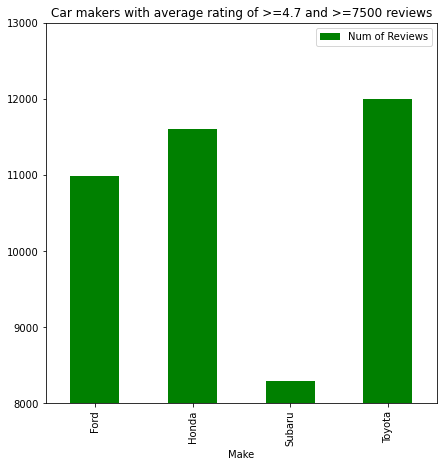

In [13]:
top_performers.plot.bar(
                             y= 'Num of Reviews' ,                             color ='green', 
                             figsize = (7,7),
                            title = 'Car makers with average rating of >=4.7 and >=7500 reviews')
plt.ylim(8000,13000, 500 )

In [14]:
three_makers = ['Toyota', 'Honda', 'Ford']
top_three = original_frame[original_frame['Make'].isin(three_makers)]
top_three.head(10)
# Filtered original datframe for the top three highest rated and most popular car manufacturers.

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
5,2012,Toyota,4Runner SR5,Used,23541,4.7,34,Dealer,AutoNation Toyota Hayward,4.4,...,–,Rear-wheel Drive,17,23,Gasoline,5-Speed Automatic,4.0L V6 24V MPFI DOHC,JTEZU5JR3C5043790,C5043790,105469
6,2017,Honda,HR-V LX,Used,20995,4.6,200,Dealer,Downtown Toyota-Subaru of Oakland,4.4,...,Black,Front-wheel Drive,28,34,Gasoline,Automatic CVT,1.8L I4 16V MPFI SOHC,3CZRU5H32HG703897,T1480,10458
8,2021,Honda,Pilot Touring 8-Passenger,Used,44299,4.8,63,Dealer,EchoPark Automotive Phoenix,4.9,...,Beige,All-wheel Drive,19,26,Gasoline,9-Speed Automatic,3.5L V6 24V GDI SOHC,5FNYF6H90MB052856,YMB052856,14445
16,2018,Ford,Explorer XLT,Used,32995,4.8,265,Dealer,Driven Auto Sales,5.0,...,Black,Four-wheel Drive,16,22,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,1FM5K8D89JGB20589,P2214,61294
18,2018,Ford,Explorer XLT,Used,33341,4.8,265,Dealer,Larry H. Miller Used Car Supermarket Sandy,3.9,...,–,Four-wheel Drive,16,22,Gasoline,Automatic,Regular Unleaded V-6 3.5 L/213,1FM5K8D82JGC77140,R5631,81375
19,2018,Ford,Explorer XLT,Used,30489,4.8,265,Dealer,EchoPark Automotive Salt Lake City Delivery Ce...,3.0,...,Ebony Black,Front-wheel Drive,17,24,Gasoline,6-Speed Automatic,2.3L I4 16V GDI DOHC Turbo,1FM5K7DH7JGC86801,PJGC86801,28357
20,2018,Ford,Explorer XLT,Used,32489,4.8,265,Dealer,EchoPark Automotive Salt Lake City Delivery Ce...,3.0,...,Ebony Black,Four-wheel Drive,16,22,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,1FM5K8D81JGC67795,PJGC67795,33188


# Most popular car from each of the three most popular manufacturers

In [16]:
Honda_data = top_three[top_three['Make']== 'Honda']
Honda_pivot_Reviewmean = Honda_data.pivot_table(index = ['Model'],
                                    values = 'ConsumerRating',
                                    aggfunc = 'mean').sort_values(by = 'ConsumerRating', ascending = False).head(15)
Honda_car_unique = unique_value[(unique_value['Make']=='Honda')]
Honda_Car_Reviews = Honda_car_unique[['Model','ConsumerReviews']].sort_values(by = 'ConsumerReviews', ascending = False).head(15)

Honda_Pivot_Reviewmean_styler = Honda_pivot_Reviewmean.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
Honda_Car_Reviews = Honda_Car_Reviews.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

display_html(Honda_Pivot_Reviewmean_styler._repr_html_()+Honda_Car_Reviews._repr_html_(), raw=True)

,ConsumerRating
Model,
Accord Sport 2.0T,5.000000
Accord Sport 1.5T,4.960000
Accord Touring 2.0T,4.933333
Accord Sport SE,4.900000
Civic Sport,4.900000
Civic EX-L,4.880000
Civic LX,4.867188
Pilot Special Edition,4.816667
CR-V EX-L,4.804233


In [ ]:
# Having the highest # of reviews and the highest average review of the highest number of reviews column; 
# Honda Accord Touring 2.0T is the most popular car.

In [22]:
Toyota_data = top_three[top_three['Make']== 'Toyota']
Toyota_pivot_Reviewmean = Toyota_data.pivot_table(index = ['Model'],
                                    values = 'ConsumerRating',
                                    aggfunc = 'mean').sort_values(by = 'ConsumerRating', ascending = False)
Toyota_car_unique = unique_value[(unique_value['Make']=='Toyota')]
Toyota_Car_Reviews = Toyota_car_unique[['Model','ConsumerReviews']].sort_values(by = 'ConsumerReviews', ascending = False)

Toyota_Pivot_Reviewmean_styler = Toyota_pivot_Reviewmean.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
Toyota_Car_Reviews = Toyota_Car_Reviews.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

display_html(Toyota_Pivot_Reviewmean_styler._repr_html_()+Toyota_Car_Reviews._repr_html_(), raw=True)

,ConsumerRating
Model,
4Runner Nightshade,4.900000
Highlander Platinum,4.900000
4Runner TRD Off Road Premium,4.900000
Tundra,4.900000
Tundra SR,4.900000
Avalon XSE,4.900000
Corolla Hatchback SE,4.866667
C-HR LE,4.866667
Highlander Hybrid Limited,4.857143


In [ ]:
# The Toyota Rav 4 XLE seems to be the most popoular Toyota Model
# given it has the highest rating of all the cars in the most reviewed section.  4.7507/5.0 with 770 Reviews.  

In [25]:
Ford_data = top_three[top_three['Make']== 'Ford']
Ford_pivot_Reviewmean = Ford_data.pivot_table(index = ['Model'],
                                    values = 'ConsumerRating',
                                    aggfunc = 'mean').sort_values(by = 'ConsumerRating', ascending = False)
Ford_car_unique = unique_value[(unique_value['Make']=='Ford')]
Ford_Car_Reviews = Ford_car_unique[['Model','ConsumerReviews']].sort_values(by = 'ConsumerReviews', ascending = False)

Ford_Pivot_Reviewmean_styler = Ford_pivot_Reviewmean.style.set_table_attributes("style='display:inline'").set_caption('Caption table 1')
Ford_Car_Reviews = Ford_Car_Reviews.style.set_table_attributes("style='display:inline'").set_caption('Caption table 2')

display_html(Ford_Pivot_Reviewmean_styler._repr_html_()+Ford_Car_Reviews._repr_html_(), raw=True)

,ConsumerRating
Model,
Fusion Hybrid Titanium,5.000000
Transit-250 Base,5.000000
Expedition XLT,4.857143
Expedition Limited,4.846667
Bronco Sport Big Bend,4.800000
Explorer Base,4.800000
F-150 Raptor,4.800000
F-150 XL,4.800000
Flex SEL,4.800000


In [ ]:
# The Ford-150XL appears to be the most popular Ford model. 
# Given it has the highest average rating of the most reviewed column with 817 reviews and 4.8 stars. 